## Visualizing Results from Hand Data

In [1]:
from kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

### `conor2.mp4` Visualization with Different Kalman Gain

In [2]:
data = np.load('conor2.npy') # load saved measurements from run_kalman.py

# initialize new Kalman filter
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

/home/conor/Homework/csci4831/yolo-hand-detection/kalman/kalman.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [0, 0, 0, t**2/2, t, 1]


In [3]:
dd = []
for datum in data:
    d = tuple(datum)
    if d == (0, 0):
        continue
    else:
        has_detected = True
        dd.append((("Actual", d), ("Predicted", kf.run(d))))
for e in dd:
    print(e)

(('Actual', (46.5, 642.0)), ('Predicted', (45.677799607072686, 630.648330058939)))
(('Actual', (45.0, 639.5)), ('Predicted', (44.086905496842974, 651.4244848810843)))
(('Actual', (46.5, 601.0)), ('Predicted', (49.62188924114549, 526.4685883411638)))
(('Actual', (52.5, 600.0)), ('Predicted', (60.96074133935848, 572.7114952120778)))
(('Actual', (57.0, 598.0)), ('Predicted', (65.73552297535167, 589.7405031277412)))
(('Actual', (60.5, 599.0)), ('Predicted', (68.29261094777416, 600.3502759812025)))
(('Actual', (85.5, 602.0)), ('Predicted', (98.35799465887449, 609.1885133545709)))
(('Actual', (87.0, 602.0)), ('Predicted', (105.80546865520478, 612.6007875849377)))
(('Actual', (91.0, 602.5)), ('Predicted', (108.77847054784682, 614.3155239611543)))
(('Actual', (90.5, 602.0)), ('Predicted', (106.47191701226684, 614.318637370466)))
(('Actual', (93.0, 600.5)), ('Predicted', (104.99346651669703, 612.7689279049551)))
(('Actual', (97.0, 600.0)), ('Predicted', (105.41776980439593, 611.3182205984922)))

In [4]:
actual = [list(x[0][1]) for x in dd]
predictions = [list(x[1][1]) for x in dd]
actual = np.asarray(actual)
predictions = np.asarray(predictions)

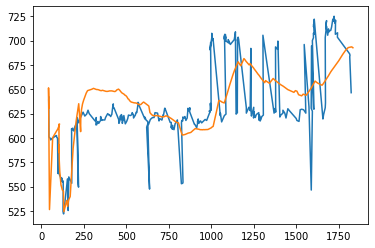

In [5]:
plt.plot(actual[:, 0], actual[:, 1])
plt.plot(predictions[:, 0], predictions[:, 1])
plt.show()

While our Kalman Filter (Orange) is rougly keeping up with the shape of the ground truth observations (Blue), there is frequent wild fluxuations of our filter's predictions in response to a ground truth that's heavy in false observations and ommitted datapoints. In addition to this, our kalman filter has a tendency to overcompensate due to a disproportionately large difference between two adjacent observations.

### `nick1.mp4` Visualization with Different Kalman Gain

/home/conor/Homework/csci4831/yolo-hand-detection/kalman/kalman.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [0, 0, 0, t**2/2, t, 1]


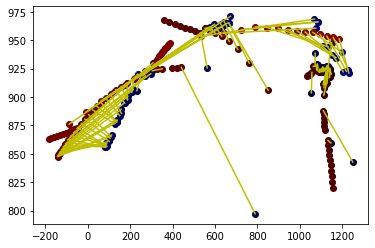

In [6]:
data = np.load('nick1.npy')

# initialize Kalman filter
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.) # KALMAN GAIN OF 1

for ri in range(len(data)):
    hex_str = hex(50+ri//2).upper()[-2:] if len(hex(50+ri//2)) > 3 else hex(50+ri//2).upper()[-1:]+'0'
    if data[ri,0] != 0 or data[ri,1] != 0:
        cx, cy = data[ri,0], data[ri,1]
        z = np.array([cx, cy])
        kf.run(z)
        xhat, yhat = kf.x[0], kf.x[3]
        plt.scatter(data[ri,0], data[ri,1], c=f'#0000{hex_str}')
        plt.plot([cx, xhat], [cy, yhat], color='y')
    else:
        kf.predict()
        xhat, yhat = kf.x[0], kf.x[3]
    plt.scatter(xhat, yhat, c=f'#{hex_str}0000')

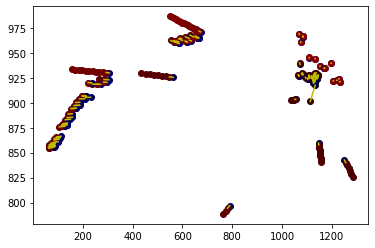

In [7]:
data = np.load('nick1.npy')

# initialize Kalman filter
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=5.) # KALMAN GAIN OF 5

for ri in range(len(data)):
    hex_str = hex(50+ri//2).upper()[-2:] if len(hex(50+ri//2)) > 3 else hex(50+ri//2).upper()[-1:]+'0'
    if data[ri,0] != 0 or data[ri,1] != 0:
        cx, cy = data[ri,0], data[ri,1]
        z = np.array([cx, cy])
        kf.run(z)
        xhat, yhat = kf.x[0], kf.x[3]
        plt.scatter(data[ri,0], data[ri,1], c=f'#0000{hex_str}')
        plt.plot([cx, xhat], [cy, yhat], color='y')
    else:
        kf.predict()
        xhat, yhat = kf.x[0], kf.x[3]
    plt.scatter(xhat, yhat, c=f'#{hex_str}0000')

Here, red represents measurements and blue is the tracked results from the filter. A darker hue represents steps earlier in the time series and a lighter hue represents steps later in the time series. 

We gain see that by increasing the Kalman Gain to 5, the tracked results pretty much follow the measurements. Whereas, if Kalman Gain is 1, we have put less weight on the measurements and form some predicted paths during occlusions of the hand.